In [ ]:
!pip install pysam
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 36.7 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm

In [ ]:
import pysam

def extract_sequences_from_fasta(fasta_file, tsv_file, output_file):
    # Apri il file TSV per leggere le posizioni
    with open(tsv_file, 'r') as tsv:
        # Salta l'intestazione
        next(tsv)
        for line in tqdm(tsv,desc='Elaborazione'):
            parts = line.strip().split('\t')
            chrom = parts[0]
            start = int(parts[1])
            end = int(parts[2])

            # Apri il file FASTA
            with pysam.FastaFile(fasta_file) as fasta:
                # Estrai la sequenza in base alle posizioni
                sequence = fasta.fetch(chrom, start, end)

                # Scrivi la sequenza in un file di output
                with open(output_file, 'a') as output:
                    output.write(f'>{chrom}:{start}-{end}\n')
                    output.write(sequence + '\n')

# Specifica i percorsi dei file
fasta_file = '/content/drive/MyDrive/hg19.fa'
tsv_file = '/content/drive/MyDrive/esoni_noduplicati.tsv'
output_file = '/content/drive/MyDrive/esoni_genoma_triplette_new.fa'

# Esegui l'estrazione delle sequenze
extract_sequences_from_fasta(fasta_file, tsv_file, output_file)

Elaborazione: 300378it [51:57, 96.34it/s] 


In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.8 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
from collections import Counter

# Definisci una funzione per generare tutte le triplette possibili
def generate_triplets():
    bases = "ACGT"
    triplets = [base1 + base2 + base3 for base1 in bases for base2 in bases for base3 in bases]
    return triplets

# Inizializza un contatore per le triplette
triplet_counter = Counter(generate_triplets())

# Carica il file FASTA
fasta_file = "/content/drive/MyDrive/esoni_genoma_triplette_new.fa"

# Esegui il conteggio delle triplette nel file FASTA
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq).upper()  # Converte la sequenza in maiuscolo
    for i in range(0, len(sequence) - 2, 3):
        triplet = sequence[i:i + 3]
        if triplet in triplet_counter:
            triplet_counter[triplet] += 1

# Stampa le frequenze delle triplette
for triplet, count in triplet_counter.items():
    print(f"{triplet}: {count}")


AAA: 971544
AAC: 457938
AAG: 683450
AAT: 613660
ACA: 645173
ACC: 467462
ACG: 166835
ACT: 522170
AGA: 733162
AGC: 633195
AGG: 732168
AGT: 517623
ATA: 452048
ATC: 433602
ATG: 570463
ATT: 617874
CAA: 618248
CAC: 589352
CAG: 903793
CAT: 608160
CCA: 804744
CCC: 688717
CCG: 302072
CCT: 828510
CGA: 175265
CGC: 262800
CGG: 296518
CGT: 173363
CTA: 347396
CTC: 675141
CTG: 889112
CTT: 700890
GAA: 705841
GAC: 423425
GAG: 709205
GAT: 464569
GCA: 632685
GCC: 658722
GCG: 261927
GCT: 662239
GGA: 718541
GGC: 675180
GGG: 695186
GGT: 495738
GTA: 331133
GTC: 415339
GTG: 593451
GTT: 475250
TAA: 495406
TAC: 334515
TAG: 338907
TAT: 470136
TCA: 671564
TCC: 678614
TCG: 167329
TCT: 758039
TGA: 666396
TGC: 610983
TGG: 768588
TGT: 656331
TTA: 495271
TTC: 669496
TTG: 588422
TTT: 970871


In [ ]:
for key in triplet_counter:
    triplet_counter[key] -= 1

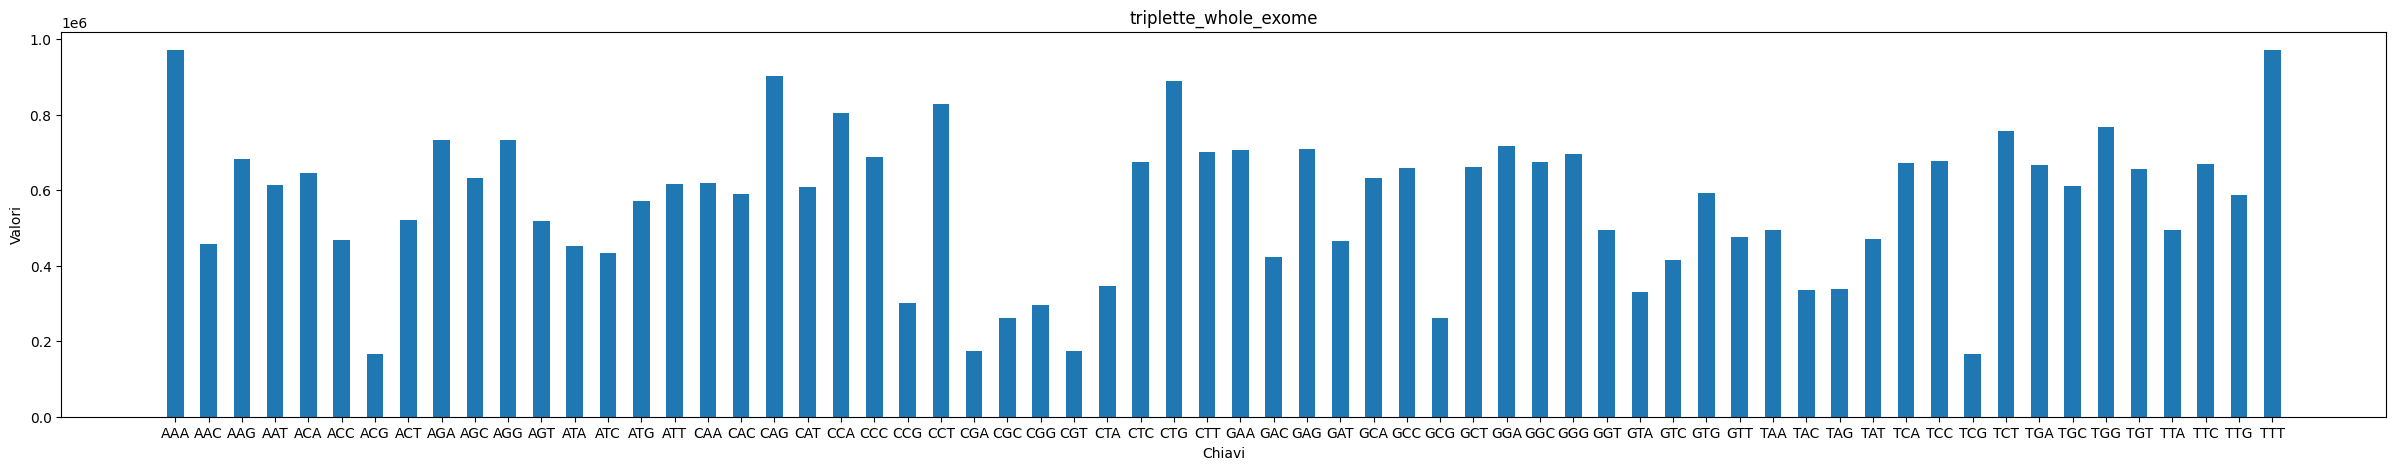

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

values = list(triplet_counter.values())
keys = list(triplet_counter.keys())
bar_width = 0.5
plt.figure(figsize=(30, 5))
plt.bar(keys, values,width=bar_width)
plt.xlabel('Chiavi')
plt.ylabel('Valori')
plt.title('triplette_whole_exome')
plt.show()

In [ ]:
# Sostituisci 'nome_file.fasta' con il nome del tuo file FASTA
#nome_file = '/content/drive/MyDrive/esoni_genoma_triplette_new.fa'

# Numero di righe da visualizzare dalla parte iniziale
#numero_righe_da_visualizzare = 10  # Modifica il numero a tuo piacimento

#with open(nome_file, 'r') as file:
    # Leggi e stampa le prime 'numero_righe_da_visualizzare' righe
#    for i in range(numero_righe_da_visualizzare):
#        line = file.readline()
#        print(line, end='')

# Chiudi il file
#file.close()
